# <center> **ПРОЕКТ: Кластеризация изображений транспортных средств**
# ЧАСТЬ 2. Визуализация и интерпретация кластеров 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

import warnings 

plt.style.use('ggplot')
warnings.simplefilter("ignore")

RS = 12 # random_state

In [2]:
img_paths = pd.read_csv('data/images_paths.csv')

img_paths.head()

,paths
0,veriwild\1\00001\000001.jpg
1,veriwild\1\00001\000002.jpg
2,veriwild\1\00001\000003.jpg
3,veriwild\1\00001\000004.jpg
4,veriwild\1\00001\000005.jpg


In [3]:
img_paths['paths'] = ('data/raw_data/' + 
                      img_paths['paths']
                      .str.replace('\\', '/'))

img_paths.head()

,paths
0,data/raw_data/veriwild/1/00001/000001.jpg
1,data/raw_data/veriwild/1/00001/000002.jpg
2,data/raw_data/veriwild/1/00001/000003.jpg
3,data/raw_data/veriwild/1/00001/000004.jpg
4,data/raw_data/veriwild/1/00001/000005.jpg


In [ ]:
def plot_samples_images(label, data=img_paths, nrows=3, ncols=7):
    """Функция для визуализации нескольких 
       случайных изображений из кластера cluster_label.
       Пути до изображений и метки кластеров должны быть 
       представлены в виде DataFrame со столбцами "paths" и "cluster".

    Args:
        data (DataFrame): таблица с разметкой изображений и соответствующих им кластеров
        cluster_label (int): номер кластера изображений
        nrows (int, optional): количество изображений по строкам таблицы (по умолчанию 3)
        ncols (int, optional): количество изображений по столбцам (по умолчанию 3)
    """
    
    # Фильтруем данные по номеру кластера
    samples_indexes = np.array(data[data['cluster'] == label].index)
    # Перемешиваем результаты
    np.random.shuffle(samples_indexes)
    # Составляем пути до изображений
    paths = data.loc[samples_indexes, 'paths']

    # Создаём фигуру и набор координатных плоскостей
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5))
    fig.suptitle(f"Cluster {label}", fontsize=16)
    
    # Создаём циклы по строкам и столбцам в таблице с координатными плоскостями
    for i in range(nrows):
        for j in range(ncols):
            # Определяем индекс пути до изображения
            path_idx = i * ncols + j
            
            if path_idx >= len(paths):
                break
                
            # Извлекаем путь до изображения
            path = paths.iloc[path_idx]
            # Читаем изображение
            img = plt.imread(path)
            
            # Убираем пометки координатных осей
            axes[i,j].axis('off')
            # Отображаем его на соответствующей координатной плоскости
            axes[i,j].imshow(img)


def plot_clusters(X, y, title, n_samples=50000, img_data=img_paths):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        title (_type_): _description_
        n_components (_type_): _description_

    Returns:
        None: _description_
    """
    X_sample = X.sample(n_samples, 
                        random_state=RS, 
                        ignore_index=False)
    y_sample = y.loc[X_sample.index]
    
    tsne_decomposer = TSNE(n_components=3, 
                           random_state=RS, 
                           n_jobs=-1)
    X_tsne = tsne_decomposer.fit_transform(X_sample)
    
    tsne_data = pd.DataFrame(X_tsne, 
                             columns=['x', 'y', 'z'], 
                             index=X_sample.index)
    tsne_data['label'] = y_sample
    
    low, high = tsne_data.quantile(0.001), tsne_data.quantile(0.999)
    
    outs = (tsne_data
            [(tsne_data < low-10) | (tsne_data > high+10)]
            .dropna(axis=0, how='all')
            .index)
    tsne_data['label'].loc[outs] = -1
    
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    palette = 'muted'
    
    sns.scatterplot(tsne_data, 
                    x='x', y='y', hue='label', 
                    palette=palette, 
                    size=0.01,
                    ax=ax[0])
    sns.scatterplot(tsne_data, 
                    x='y', y='z', hue='label', 
                    palette=palette, 
                    size=0.01,
                    ax=ax[1])
    sns.scatterplot(tsne_data, 
                    x='x', y='z', hue='label', 
                    palette=palette, 
                    size=0.01,
                    ax=ax[2])

    fig.suptitle(title)
    fig.show()
    
    img_data = img_data.iloc[tsne_data.index]
    img_data['cluster'] = tsne_data['label']

    for i in np.unique(tsne_data['label']):
        plot_samples_images(i, img_data)
        
        
def display_X_y(X, y):
    y = y.rename(columns={'0': 'label'})
    Xy = pd.concat([X, y], axis=1)
    
    return Xy

# **EFFICIENTNET**

## KMeans

In [5]:
X_effnet_kmeans = pd.read_csv('new_data/X_effnet_kmeans.csv')
y_effnet_kmeans = pd.read_csv('new_data/y_effnet_kmeans.csv')

display_X_y(X_effnet_kmeans, y_effnet_kmeans)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,1.168531,-1.498566,-0.937182,-1.155292,0.023959,0.536520,0.254563,-0.325289,0.839346,0.544303,...,-0.215345,-0.311537,-0.072786,-0.723742,0.310990,-0.144287,-0.173032,-0.212570,0.251763,0
1,-0.008176,-1.270316,-1.489943,-0.680817,-1.410649,-0.057027,-0.661654,-1.093476,0.343870,1.128726,...,-0.007984,0.682900,0.063487,0.281706,-0.631260,0.159930,0.291991,0.147000,0.190407,0
2,-5.039887,-0.399712,1.940000,-1.477294,0.199979,-1.646544,0.811667,0.199217,-1.841696,-1.073119,...,-0.014611,-0.130962,-0.189998,0.743760,0.301353,-0.094788,-0.606863,-0.537364,0.051105,1
3,-0.130577,-0.991995,-3.417443,-0.435263,0.094064,1.113112,0.670755,-0.945055,0.136319,0.987983,...,0.146682,-0.135725,0.182507,0.078023,0.500288,0.168696,0.451763,-0.051791,-0.275876,0
4,1.620168,0.183150,0.379166,-1.064365,1.510494,0.146177,-0.705331,0.515905,0.315611,-0.818774,...,0.491982,-0.058760,0.290086,0.170976,0.045364,-0.443434,-0.258586,-0.318165,-0.057691,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416309,0.522065,-2.236756,0.248677,-0.482027,1.384725,-0.794997,1.231313,-0.893183,-1.645648,0.626281,...,-0.030704,-0.080279,0.331194,0.312586,0.390148,-0.161376,0.490215,-0.182059,0.162860,0
416310,0.899969,1.037630,0.263305,0.510537,1.214489,0.160153,0.794131,0.072722,0.109532,0.764846,...,0.244360,0.362709,0.168210,-0.505718,0.450479,0.528950,0.146117,-0.170680,0.061081,0
416311,0.056464,1.833268,0.952465,0.948369,0.301587,-0.916484,0.184943,-0.693426,-1.138601,-0.172001,...,-0.114554,-0.501054,-0.215474,0.327979,0.057047,-0.174115,0.163722,-0.312654,-0.263683,0
416312,-1.592261,-1.122951,-1.775055,0.130897,-0.329622,0.473608,-0.409526,0.031067,0.563154,-1.254836,...,-0.013504,0.465652,0.208049,0.033067,-0.272515,-0.226196,0.312759,-0.199676,0.425512,0


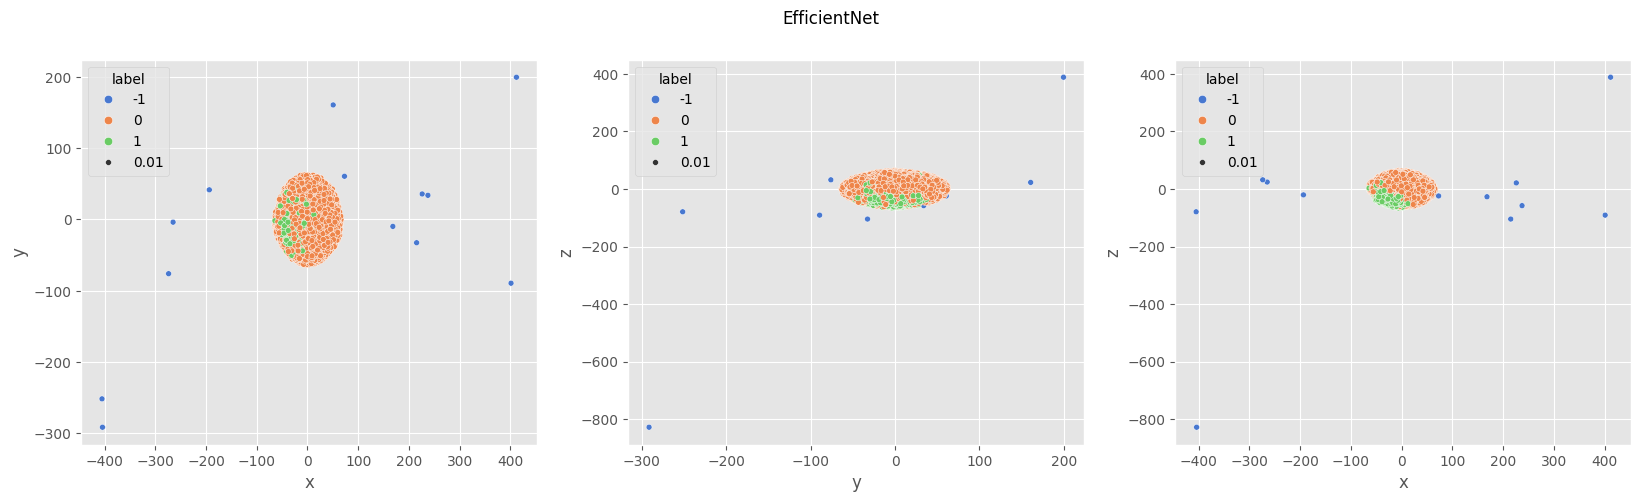

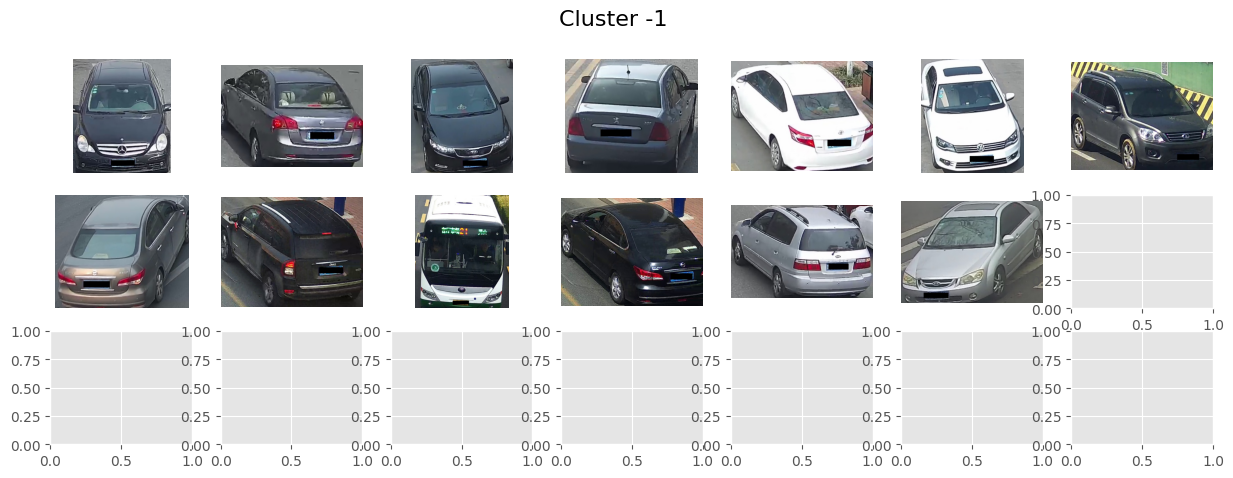

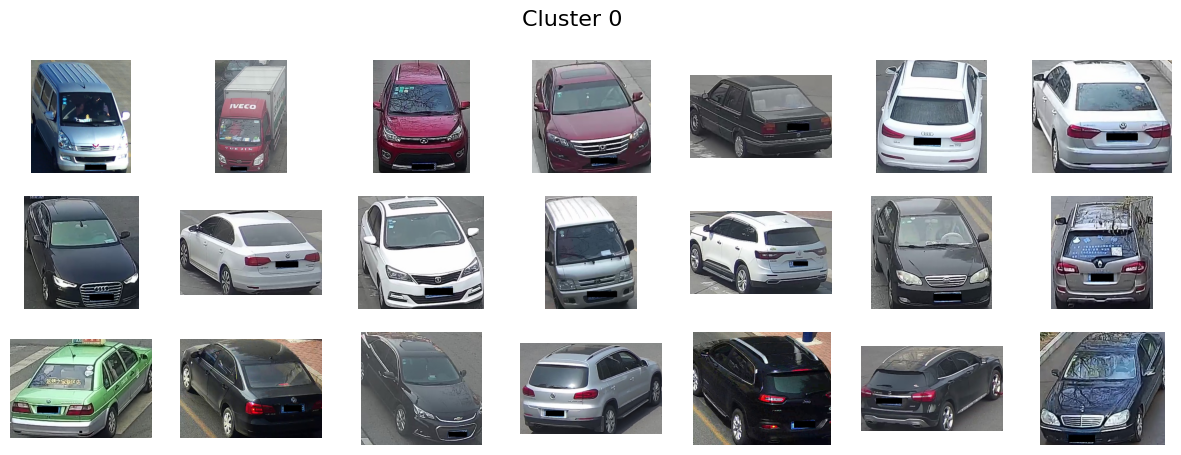

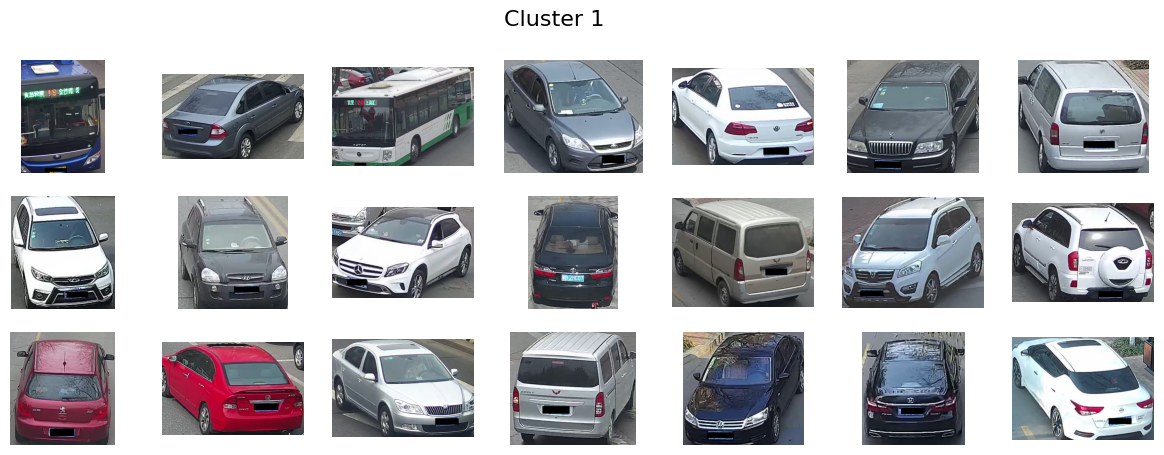

In [164]:
plot_clusters(X_effnet_kmeans, y_effnet_kmeans, 'EfficientNet') 